In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/misbah4064/face_mask_detection.git
%cd face_mask_detection

Cloning into 'face_mask_detection'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 15 (delta 1), reused 0 (delta 0), pack-reused 12
Unpacking objects: 100% (15/15), done.
/content/face_mask_detection/face_mask_detection


In [ ]:
import cv2
import os

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from google.colab.patches import cv2_imshow

faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")
model = load_model("mask_recog.h5")




def face_mask_detector(frame):
 
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
  faces = faceCascade.detectMultiScale(gray,
                                        scaleFactor=1.1,
                                        minNeighbors=5,
                                        minSize=(60, 60),
                                        flags=cv2.CASCADE_SCALE_IMAGE)
  faces_list=[]
  preds=[]




  for (x, y, w, h) in faces:
      face_frame = frame[y:y+h,x:x+w]
      face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
      face_frame = cv2.resize(face_frame, (224, 224))
      face_frame = img_to_array(face_frame)
      face_frame = np.expand_dims(face_frame, axis=0)
      face_frame =  preprocess_input(face_frame)
      faces_list.append(face_frame)
      if len(faces_list)>0:
          preds = model.predict(faces_list)
      for pred in preds:
          (mask, withoutMask) = pred
      label = "Mask" if mask > withoutMask else "No Mask"
      color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
      cv2.putText(frame, label, (x, y- 10),
                  cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

      cv2.rectangle(frame, (x, y), (x + w, y + h),color, 3)

  return frame



1/1 [==============================] - 1s 1s/step


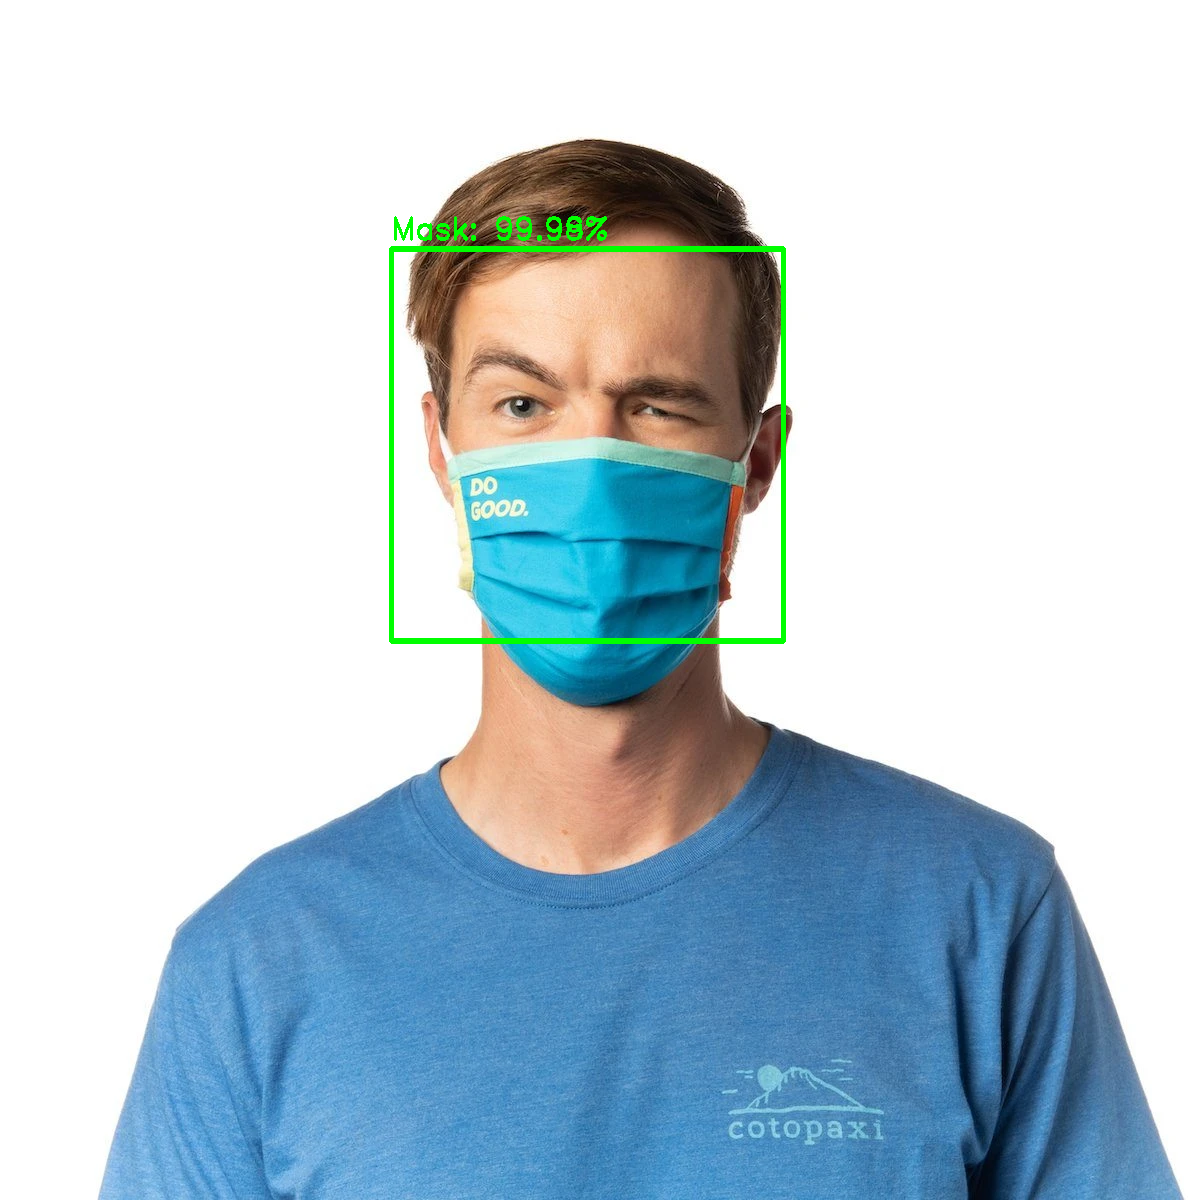

In [ ]:
input_image = cv2.imread("234.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

In [ ]:
input_image = cv2.imread("1.png")
output = face_mask_detector(input_image)
cv2_imshow(output)

error: ignored

In [ ]:
input_image = cv2.imread("image3.png")
output = face_mask_detector(input_image)
cv2_imshow(output)

NameError: ignored

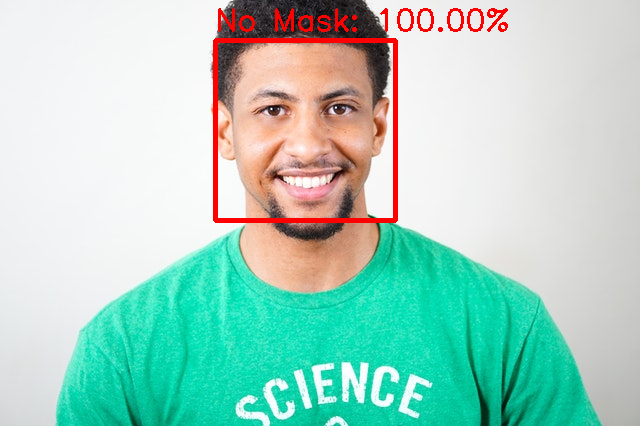

In [ ]:
input_image = cv2.imread("image4.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

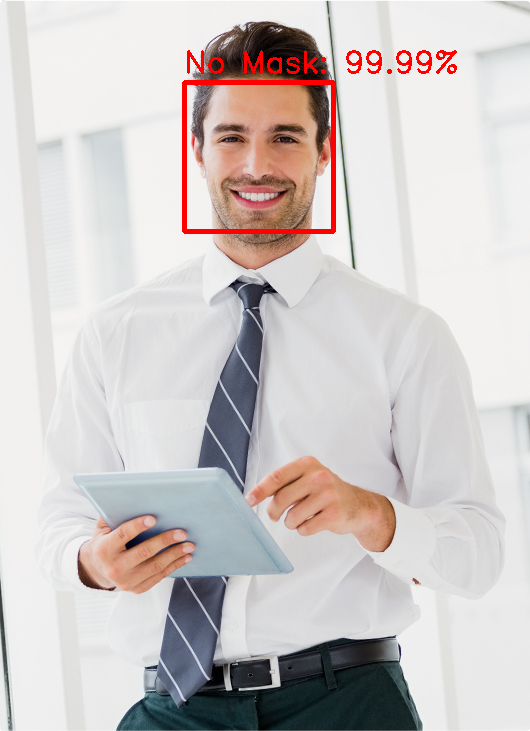

In [ ]:
input_image = cv2.imread("pic11.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)